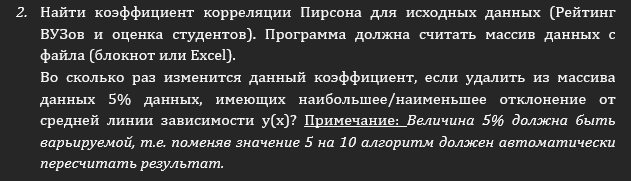

In [3]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import csv

import os

current_directory = os.getcwd()
file_path = os.path.join(current_directory, "4__09.30__табл для кореляц.xlsx")

data = pd.read_excel(file_path)

In [6]:
# Извлечение нужных столбцов
x = data['student'].values
y = data['rating'].values

# 1. Коэффициент корреляции Пирсона для исходных данных
initial_pearson_corr, _ = pearsonr(x, y)

# 2. Определение средней линии зависимости y(x) с использованием линейной регрессии
reg_model = LinearRegression()
reg_model.fit(x.reshape(-1, 1), y)
y_pred = reg_model.predict(x.reshape(-1, 1))

# Вычисление отклонений от средней линии
deviations = np.abs(y - y_pred)

# Определим функцию для удаления выбросов и повторного расчета корреляции
def calculate_modified_correlation(x, y, deviations, outlier_percentage):
    # Определение количества выбросов, которые нужно удалить
    num_outliers = int(len(x) * (outlier_percentage / 100))
    
    # Получение индексов точек с наибольшими отклонениями
    outlier_indices = np.argsort(deviations)[-num_outliers:]
    
    # Удаление выбросов
    x_filtered = np.delete(x, outlier_indices)
    y_filtered = np.delete(y, outlier_indices)
    
    # Коэффициент корреляции Пирсона для данных без выбросов
    modified_pearson_corr, _ = pearsonr(x_filtered, y_filtered)
    
    return modified_pearson_corr

# 5% выбросов
modified_corr_5 = calculate_modified_correlation(x, y, deviations, 5)

# 10% выбросов
modified_corr_10 = calculate_modified_correlation(x, y, deviations, 10)

# Соотношение измененных коэффициентов к начальному
ratio_5_percent = modified_corr_5 / initial_pearson_corr
ratio_10_percent = modified_corr_10 / initial_pearson_corr

initial_pearson_corr, modified_corr_5, ratio_5_percent, modified_corr_10, ratio_10_percent

print(f"Коэффициент корреляции до удаления выбросов: {initial_pearson_corr}")
print(f"Коэффициент корреляции после удаления выбросов 5%: {modified_corr_5}")
print(f"Коэффициент корреляции после удаления выбросов 10%: {modified_corr_10}")

Коэффициент корреляции до удаления выбросов: 0.4920592224603668
Коэффициент корреляции после удаления выбросов 5%: 0.5401634214450176
Коэффициент корреляции после удаления выбросов 10%: 0.6993097893590068


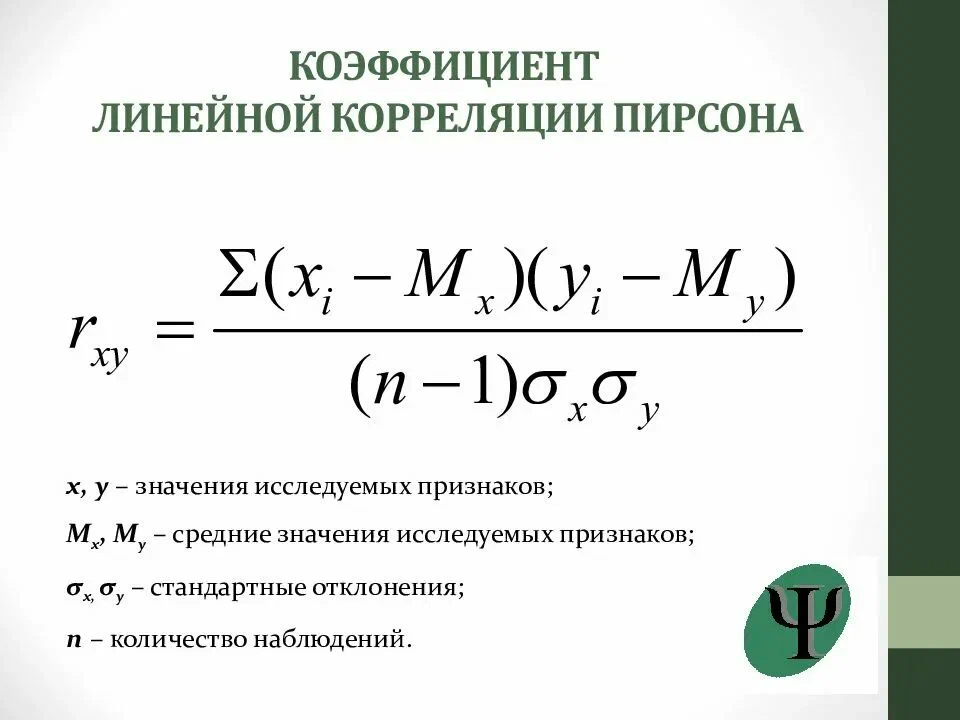